# Разведочный анализ данных для MultiModus

В этом ноутбуке проводится разведочный анализ данных (EDA) и базовая проверка работы рекомендательной системы MultiModus на примере датасета openfoodfacts-products.jsonl.gz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path.append(str(Path('..').resolve() / 'backend'))
from recommender import load_off_dataset_light, AutoMLRecommender

pd.set_option('display.max_columns', 20)
sns.set(style="whitegrid")

## Загрузка и первичный просмотр данных
Загрузим данные с помощью функции load_off_dataset_light и посмотрим на структуру DataFrame.

In [2]:
jsonl_path = '../openfoodfacts-products.jsonl.gz'

tab, text, labels, df = load_off_dataset_light(jsonl_path, n_samples=1000)

print('Размерность DataFrame:', df.shape)
display(df.head())
print('\nТипы данных:')
print(df.dtypes)
print('\nПример текстового поля:')
print(text[0])

Размерность DataFrame: (1000, 5)


,product_name,ingredients_text,nutriments,categories,main_category
0,Chamomile Herbal Tea,CHAMOMILE FLOWERS.,{'fruits-vegetables-legumes-estimate-from-ingr...,null,null
1,"Lagg's, herbal tea, peppermint",Peppermint.,"{'sodium_100g': 0.004, 'proteins_value': 0, 'p...","Plant-based foods and beverages, Beverages, Ho...",Plant-based foods and beverages
2,Linden Flowers Tea,LINDEN FLOWERS.,"{'potassium_unit': 'mg', 'sodium': 0, 'salt': ...","Beverages and beverages preparations, Plant-ba...",Beverages and beverages preparations
3,Apple & Cinnamon Tea,"TEA, CINNAMON & NATURAL APPLE FLAVOR.","{'carbohydrates_serving': 60, 'proteins': 66.6...",null,null
4,Green Tea,GREEN TEA.,"{'salt': 0, 'sodium_value': 0, 'energy-kcal_va...",null,null



Типы данных:
product_name        object
ingredients_text    object
nutriments          object
categories          object
main_category       object
dtype: object

Пример текстового поля:
Chamomile Herbal Tea. CHAMOMILE FLOWERS.


## Анализ распределения категорий и признаков
Посмотрим на распределение товаров по категориям и статистики по основным числовым признакам.

Уникальных категорий: 61


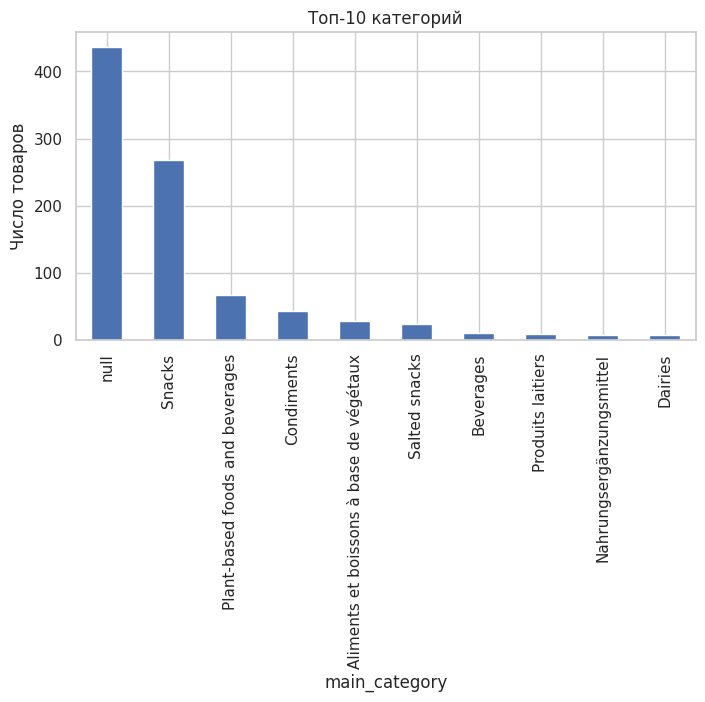

Статистики по нутриентам:


,fruits-vegetables-legumes-estimate-from-ingredients_serving,fat_value,sodium,potassium_value,fat_serving,energy-kcal,fat,carbohydrates,sodium_serving,energy-kcal_value,...,glucose_100g,soluble-fiber,soluble-fiber_serving,soluble-fiber_value,insoluble-fiber,soluble-fiber_100g,insoluble-fiber_serving,insoluble-fiber_value,insoluble-fiber_100g,carbon-footprint-from-meat-or-fish_serving
count,999.000000,984.000000,957.000000,60.000000,891.000000,967.000000,984.000000,982.000000,864.000000,967.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.000000
mean,14.523095,16.793603,0.486945,204.634824,12.334980,248.817213,16.793603,37.246959,0.294712,248.817213,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,2417.333333
std,26.755461,19.179498,2.064295,510.248377,15.830363,191.472757,19.179498,26.998648,1.681562,191.472757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2829.289899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,392.000000
25%,0.000000,0.000000,0.028000,0.038600,0.000000,100.000000,0.000000,8.800000,0.015200,100.000000,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,801.000000
50%,0.000000,7.250000,0.095000,0.280000,4.500000,214.000000,7.250000,41.670000,0.078000,214.000000,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,1210.000000
75%,13.591481,32.500000,0.340000,189.500000,19.000000,361.960000,32.500000,57.500000,0.220000,361.960000,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,3430.000000
max,100.000000,100.000000,41.667000,3200.000000,100.000000,900.000000,100.000000,100.000000,41.667000,900.000000,...,0.4,5.0,5.0,5.0,5.0,11.6,5.0,5.0,11.6,5650.000000


In [3]:
cat_counts = df['main_category'].value_counts()
print('Уникальных категорий:', df['main_category'].nunique())
cat_counts.head(10).plot(kind='bar', figsize=(8,4), title='Топ-10 категорий')
plt.ylabel('Число товаров')
plt.show()

num_cols = ['nutriments']
print('Статистики по нутриентам:')
nutr_df = pd.DataFrame(list(df['nutriments']))
display(nutr_df.describe())

## Проверка наличия пропусков и базовая очистка
Проверим наличие пропусков в ключевых полях и при необходимости обработаем их.

In [4]:
print('Пропуски по столбцам:')
print(df.isnull().sum())

nutr_df = pd.DataFrame(list(df['nutriments']))
print('Пропуски по нутриентам:')
print(nutr_df.isnull().sum())

nutr_df = nutr_df.fillna(0)

df['nutriments'] = nutr_df.to_dict(orient='records')

Пропуски по столбцам:
product_name        0
ingredients_text    0
nutriments          0
categories          0
main_category       0
dtype: int64
Пропуски по нутриентам:
fruits-vegetables-legumes-estimate-from-ingredients_serving      1
fat_value                                                       16
sodium                                                          43
potassium_value                                                940
fat_serving                                                    109
                                                              ... 
carbohydrates_prepared_unit                                    999
salt_prepared_unit                                             999
carbon-footprint-from-meat-or-fish_serving                     997
fat_prepared_unit                                              999
polyols_label                                                  999
Length: 346, dtype: int64


## Визуализация признаков
Построим гистограммы по основным числовым признакам и визуализируем распределение категорий.

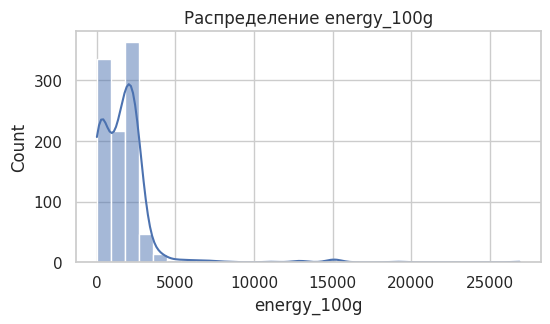

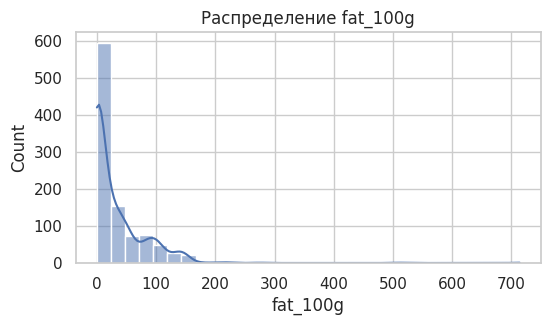

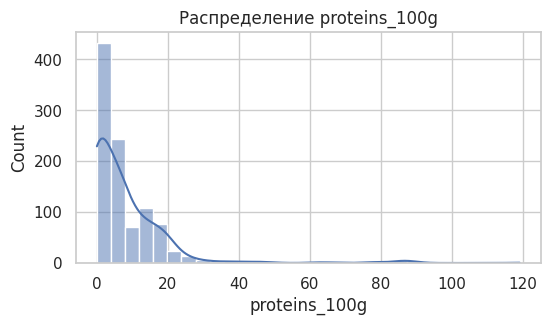

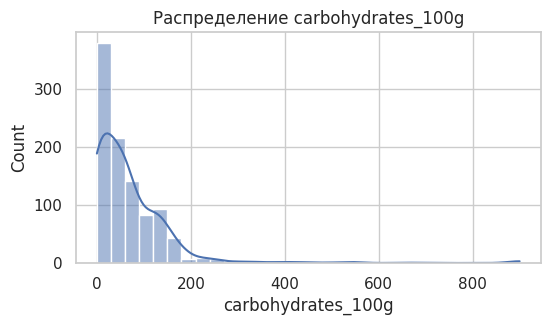

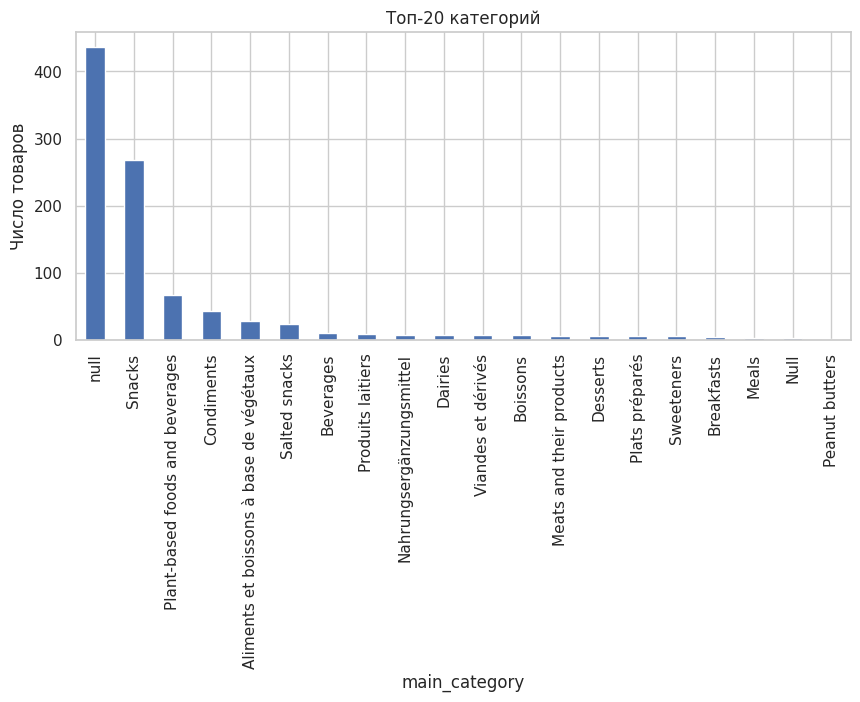

In [5]:
for col in ['energy_100g', 'fat_100g', 'proteins_100g', 'carbohydrates_100g']:
    if col in nutr_df:
        plt.figure(figsize=(6,3))
        sns.histplot(nutr_df[col], bins=30, kde=True)
        plt.title(f'Распределение {col}')
        plt.show()

plt.figure(figsize=(10,4))
cat_counts.head(20).plot(kind='bar')
plt.title('Топ-20 категорий')
plt.ylabel('Число товаров')
plt.show()

## Проверка текстовых данных
Посчитаем длину текстовых полей, выведем примеры, построим частотный график.

Средняя длина текста: 35.187
Медианная длина текста: 30.0
Примеры текстовых описаний:
---
Chamomile Herbal Tea. CHAMOMILE FLOWERS....
---
Lagg's, herbal tea, peppermint. Peppermint....
---
Linden Flowers Tea. LINDEN FLOWERS....


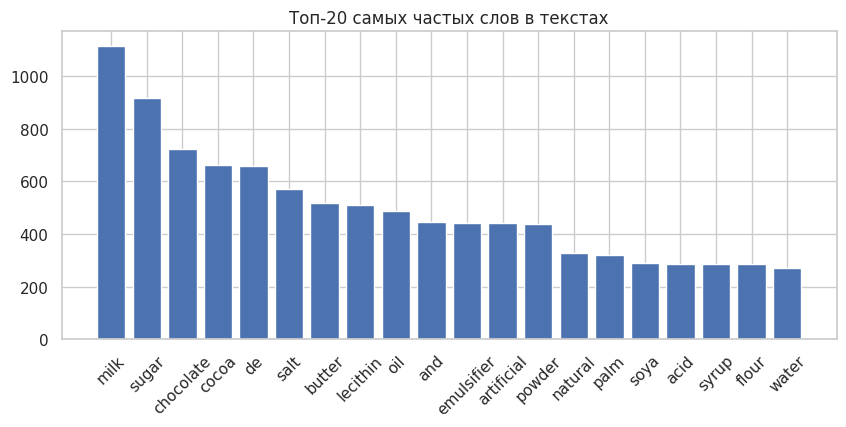

In [6]:
text_lengths = [len(t.split()) for t in text]
print('Средняя длина текста:', np.mean(text_lengths))
print('Медианная длина текста:', np.median(text_lengths))

print('Примеры текстовых описаний:')
for i in range(3):
    print(f'---\n{text[i][:200]}...')

from collections import Counter
import re
all_words = Counter()
for t in text:
    all_words.update(re.findall(r'\w+', t.lower()))
most_common = all_words.most_common(20)

plt.figure(figsize=(10,4))
words, freqs = zip(*most_common)
plt.bar(words, freqs)
plt.title('Топ-20 самых частых слов в текстах')
plt.xticks(rotation=45)
plt.show()

## Пробное формирование табличных и текстовых признаков
Сформируем массивы признаков для табличных и текстовых данных, проверим их размерности.

In [7]:
if isinstance(tab, np.ndarray):
    print('Табличные признаки:', tab.shape)
else:
    print('Нет табличных признаков')

print('Число текстовых примеров:', len(text))

print('Число меток:', len(labels))
print('Уникальных меток:', len(np.unique(labels)))

Табличные признаки: (1000, 4)
Число текстовых примеров: 1000
Число меток: 1000
Уникальных меток: 61


## Пробное обучение и получение рекомендаций
Обучим AutoMLRecommender на небольшом сэмпле и получим рекомендации для нескольких товаров.

In [12]:
n_train = 10000
mm = AutoMLRecommender(use_tabular=True, use_text=True)
mm.fit(tab[:n_train], text[:n_train], labels[:n_train], n_neighbors=6)

for idx in range(3):
    rec_idx = mm.recommend(idx, k=5)
    print(f'Товар: {df.loc[idx, "product_name"]}')
    print('Рекомендации:')
    for i in rec_idx:
        print(f'  - {df.loc[i, "product_name"]}')
    print('---')

Товар: Chamomile Herbal Tea
Рекомендации:
  - Flat Leaf Parsley
  - Large flat mushrooms
  - Lagg's, dieter's herbal tea
  - Broccoli
  - Blanche Drao
---
Товар: Lagg's, herbal tea, peppermint
Рекомендации:
  - Black Tea
  - Salade Mac
  - Spring onion
  - Large flat mushrooms
  - Bronchtea
---
Товар: Linden Flowers Tea
Рекомендации:
  - Flat Leaf Parsley
  - Large flat mushrooms
  - Lagg's, dieter's herbal tea
  - Broccoli
  - Blanche Drao
---


## Оценка метрик рекомендаций на небольшом сэмпле
Вычислим основные метрики качества рекомендаций для обученной модели.

In [13]:
k = 5
d, idxs = mm.nn.kneighbors(mm.X_, n_neighbors=k+1)
idxs = idxs[:, 1:]

p = mm.precision_at_k(labels[:n_train], idxs, k=k)
r = mm.recall_at_k(labels[:n_train], idxs, k=k)
mapk = mm.map_at_k(labels[:n_train], idxs, k=k)
mrrk = mm.mrr_at_k(labels[:n_train], idxs, k=k)
div = mm.diversity_at_k(idxs, k=k)

print(f'Precision@{k}:', round(p, 3))
print(f'Recall@{k}:', round(r, 3))
print(f'MAP@{k}:', round(mapk, 3))
print(f'MRR@{k}:', round(mrrk, 3))
print(f'Diversity@{k}:', round(div, 3))

Precision@5: 0.687
Recall@5: 0.861
MAP@5: 0.654
MRR@5: 0.794
Diversity@5: 0.19


## Сравнение метрик при разных комбинациях признаков

Проведём сравнение качества рекомендаций (Precision@k, Recall@k, MAP@k, MRR@k, Diversity@k) при использовании только табличных, только текстовых и обоих типов признаков. На графике ниже можно наглядно увидеть, как изменяются метрики в зависимости от выбранного подхода.

,Тип признаков,Precision@k,Recall@k,MAP@k,MRR@k,Diversity@k
0,Табличные+Текстовые,0.6870,0.861,0.653783,0.794133,0.1900
1,Только табличные,0.6346,0.846,0.598053,0.729733,0.1696
2,Только текстовые,0.4996,0.821,0.425670,0.675100,0.1810


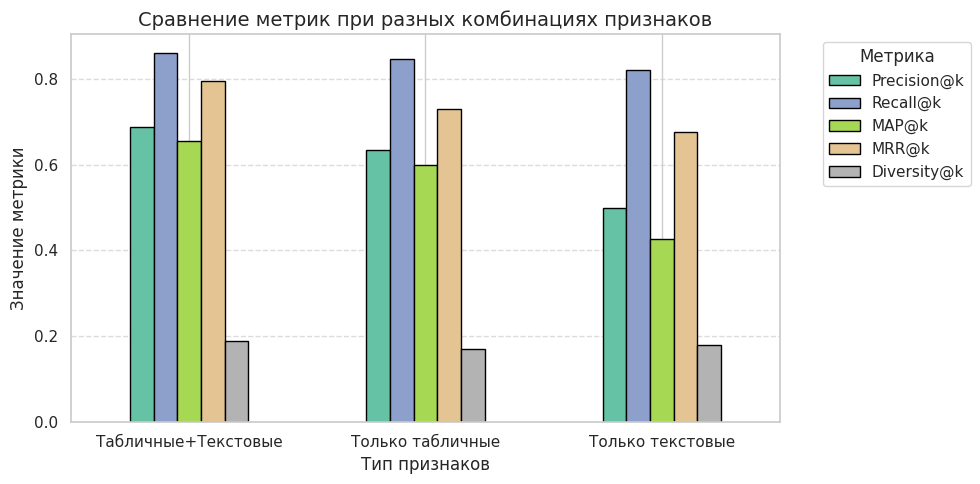

In [ ]:
results = []
feature_sets = [
    (True, True, 'Табличные+Текстовые'),
    (True, False, 'Только табличные'),
    (False, True, 'Только текстовые'),
]

for use_tabular, use_text, label in feature_sets:
    mm = AutoMLRecommender(use_tabular=use_tabular, use_text=use_text)
    mm.fit(tab[:n_train], text[:n_train], labels[:n_train], n_neighbors=6)
    d, idxs = mm.nn.kneighbors(mm.X_, n_neighbors=k+1)
    idxs = idxs[:, 1:]
    p = mm.precision_at_k(labels[:n_train], idxs, k=k)
    r = mm.recall_at_k(labels[:n_train], idxs, k=k)
    mapk = mm.map_at_k(labels[:n_train], idxs, k=k)
    mrrk = mm.mrr_at_k(labels[:n_train], idxs, k=k)
    div = mm.diversity_at_k(idxs, k=k)
    results.append({
        'Тип признаков': label,
        'Precision@k': p,
        'Recall@k': r,
        'MAP@k': mapk,
        'MRR@k': mrrk,
        'Diversity@k': div
    })

results_df = pd.DataFrame(results)
display(results_df)

metrics = ['Precision@k', 'Recall@k', 'MAP@k', 'MRR@k', 'Diversity@k']
ax = results_df.set_index('Тип признаков')[metrics].plot(kind='bar', figsize=(10,5), colormap='Set2', edgecolor='black')
plt.title('Сравнение метрик при разных комбинациях признаков', fontsize=14)
plt.ylabel('Значение метрики')
plt.xticks(rotation=0)
plt.legend(title='Метрика', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()